In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import plotly.express as px
import seaborn as sns
import matplotlib.pyplot as plt
from learntools.deep_learning_intro.dltools import animate_sgd
plt.style.use('seaborn-whitegrid')
# Set Matplotlib defaults
plt.rc('figure', autolayout=True)
plt.rc('axes', labelweight='bold', labelsize='large',
       titleweight='bold', titlesize=18, titlepad=10)
plt.rc('animation', html='html5')
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/global-sea-level-1993-2021/sealevel.csv


In [2]:
df = pd.read_csv('/kaggle/input/global-sea-level-1993-2021/sealevel.csv')
df.head()

,Year,TotalWeightedObservations,GMSL_noGIA,StdDevGMSL_noGIA,SmoothedGSML_noGIA,GMSL_GIA,StdDevGMSL_GIA,SmoothedGSML_GIA,SmoothedGSML_GIA_sigremoved
0,1993,327401.31,-38.59,89.86,-38.76,-38.59,89.86,-38.75,-38.57
1,1993,324498.41,-41.97,90.86,-39.78,-41.97,90.86,-39.77,-39.11
2,1993,333018.19,-41.93,87.27,-39.62,-41.91,87.27,-39.61,-38.58
3,1993,297483.19,-42.67,90.75,-39.67,-42.65,90.74,-39.64,-38.34
4,1993,321635.81,-37.86,90.26,-38.75,-37.83,90.25,-38.72,-37.21


In [3]:
df.describe()

,Year,TotalWeightedObservations,GMSL_noGIA,StdDevGMSL_noGIA,SmoothedGSML_noGIA,GMSL_GIA,StdDevGMSL_GIA,SmoothedGSML_GIA,SmoothedGSML_GIA_sigremoved
count,1048.000000,1048.000000,1048.000000,1048.000000,1048.000000,1048.000000,1048.000000,1048.000000,1048.000000
mean,2006.742366,326568.269981,4.645515,87.007700,4.702004,8.112557,87.062805,8.168273,8.213044
std,8.231978,28044.226934,26.351001,5.525201,26.171990,28.310139,5.557840,28.138879,27.976127
min,1993.000000,906.100000,-44.390000,77.410000,-39.780000,-43.140000,77.420000,-39.770000,-39.110000
25%,2000.000000,327418.897500,-18.250000,83.510000,-17.882500,-16.615000,83.617500,-16.087500,-17.440000
50%,2007.000000,331979.205000,1.930000,85.925000,1.505000,5.465000,85.935000,5.065000,5.170000
75%,2014.000000,335243.865000,25.857500,88.602500,26.115000,30.942500,88.732500,31.095000,29.697500
max,2021.000000,341335.090000,57.920000,118.720000,56.310000,64.390000,118.760000,63.070000,60.560000


In [4]:
df.shape

(1048, 9)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048 entries, 0 to 1047
Data columns (total 9 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Year                         1048 non-null   int64  
 1   TotalWeightedObservations    1048 non-null   float64
 2   GMSL_noGIA                   1048 non-null   float64
 3   StdDevGMSL_noGIA             1048 non-null   float64
 4   SmoothedGSML_noGIA           1048 non-null   float64
 5   GMSL_GIA                     1048 non-null   float64
 6   StdDevGMSL_GIA               1048 non-null   float64
 7   SmoothedGSML_GIA             1048 non-null   float64
 8   SmoothedGSML_GIA_sigremoved  1048 non-null   float64
dtypes: float64(8), int64(1)
memory usage: 73.8 KB


In [6]:
df.isnull().sum()

Year                           0
TotalWeightedObservations      0
GMSL_noGIA                     0
StdDevGMSL_noGIA               0
SmoothedGSML_noGIA             0
GMSL_GIA                       0
StdDevGMSL_GIA                 0
SmoothedGSML_GIA               0
SmoothedGSML_GIA_sigremoved    0
dtype: int64

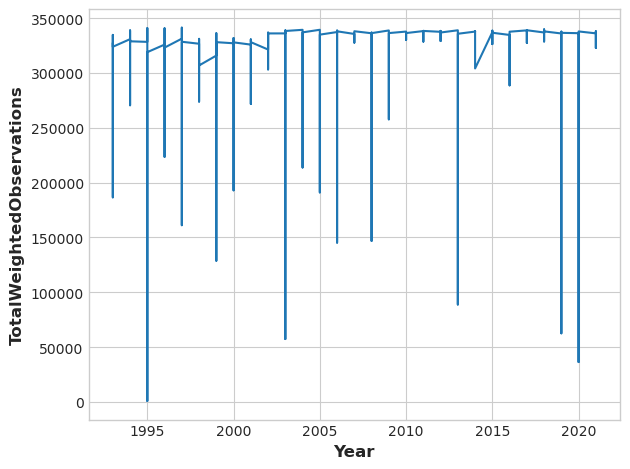

In [7]:
year = df['Year']
two = df['TotalWeightedObservations']
plt.plot(year,two)
plt.xlabel('Year')
plt.ylabel('TotalWeightedObservations')

plt.show()



In [8]:
def plotColumns(col):
    return sns.scatterplot(data = df, x = 'Year', y = col)


<AxesSubplot:xlabel='Year', ylabel='SmoothedGSML_noGIA'>

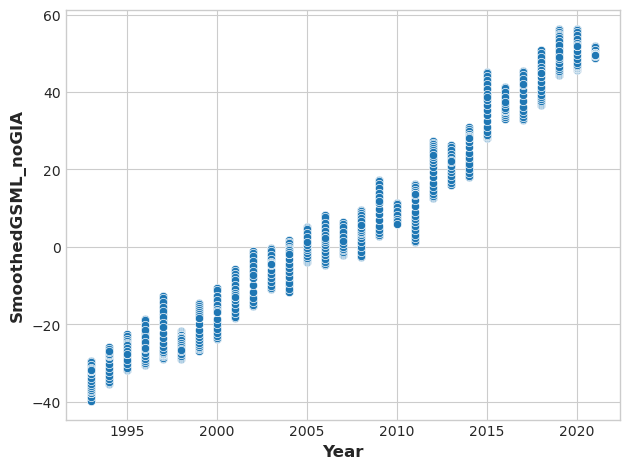

In [9]:
plotColumns('SmoothedGSML_noGIA')


<AxesSubplot:xlabel='Year', ylabel='GMSL_GIA'>

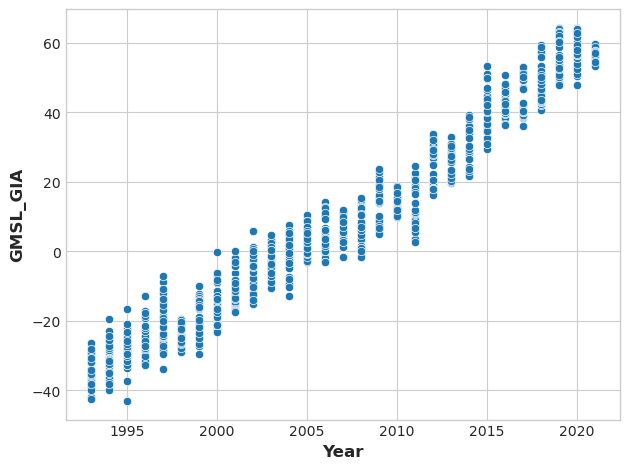

In [10]:
plotColumns('GMSL_GIA')


<AxesSubplot:xlabel='Year', ylabel='SmoothedGSML_GIA'>

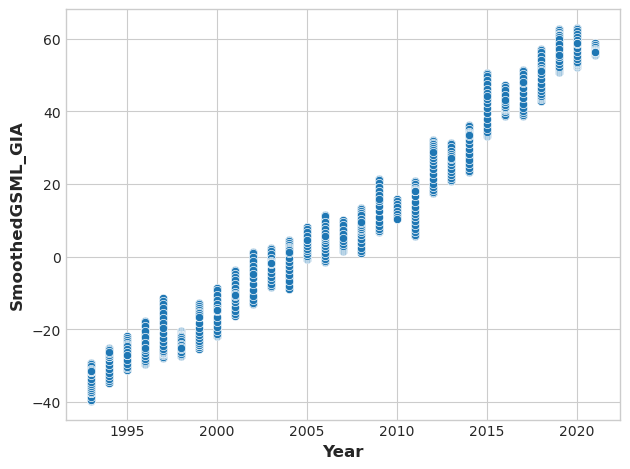

In [11]:
plotColumns('SmoothedGSML_GIA')


<AxesSubplot:xlabel='Year', ylabel='SmoothedGSML_GIA_sigremoved'>

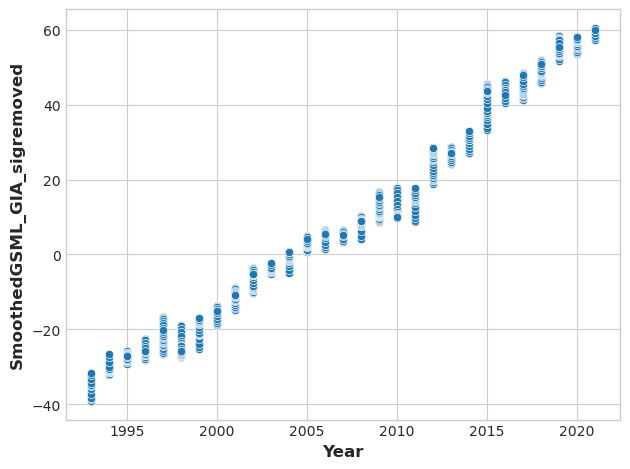

In [12]:
plotColumns('SmoothedGSML_GIA_sigremoved')


<AxesSubplot:xlabel='Year', ylabel='StdDevGMSL_GIA'>

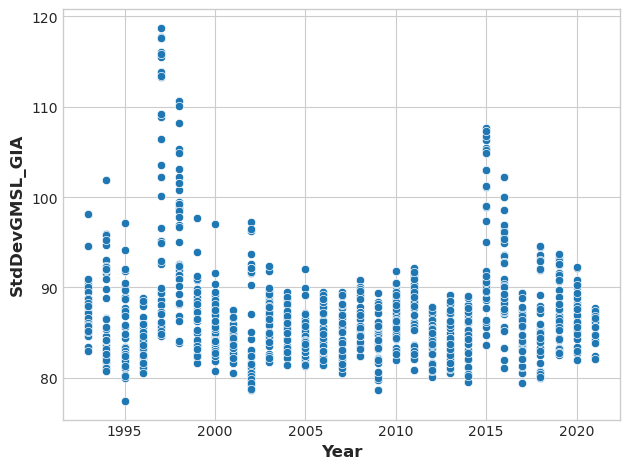

In [13]:
plotColumns('StdDevGMSL_GIA')


<AxesSubplot:xlabel='Year', ylabel='StdDevGMSL_noGIA'>

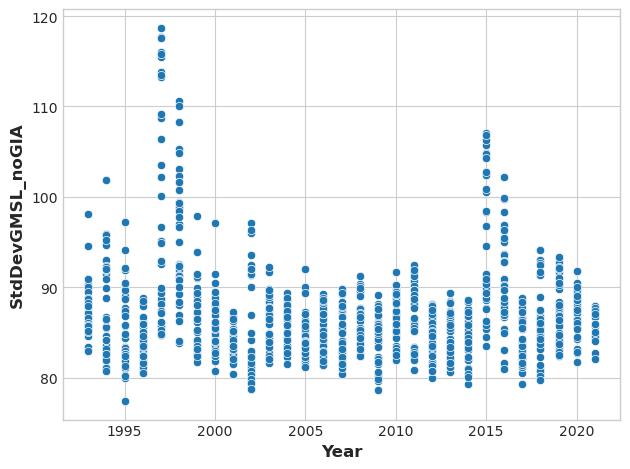

In [14]:
plotColumns('StdDevGMSL_noGIA')


13:32:15 - cmdstanpy - INFO - Chain [1] start processing
13:32:16 - cmdstanpy - INFO - Chain [1] done processing


Text(76.33333333333333, 0.5, 'Smoothed GSML w/ GIA')

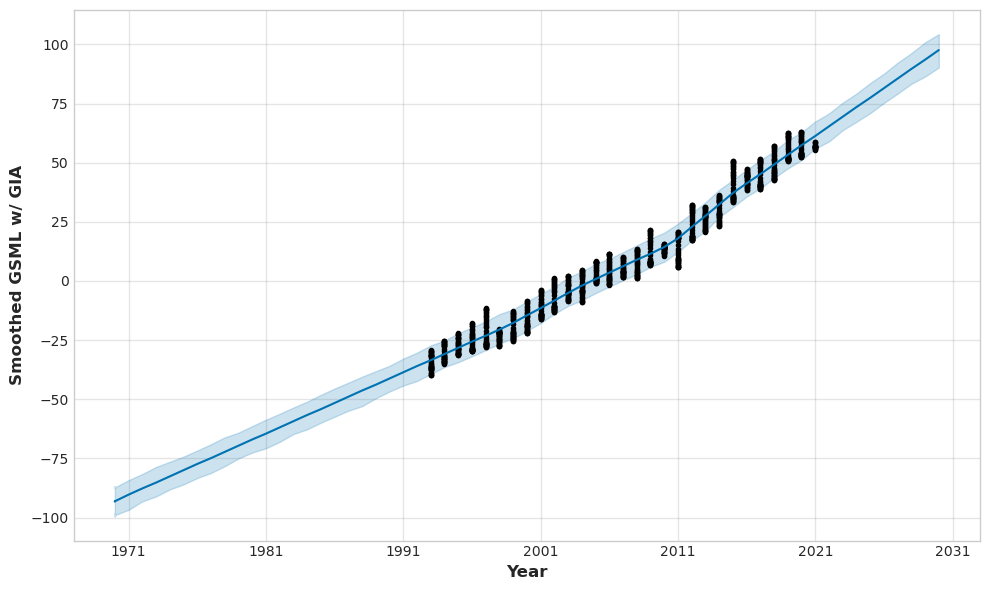

In [15]:
from prophet import Prophet


df1=pd.DataFrame()
df1['Year'] = df['Year']
df1['SmoothedGSML_GIA'] = df['SmoothedGSML_GIA']

ts = df1.rename(columns={'Year':'ds', 'SmoothedGSML_GIA':'y'})

ts.columns=['ds','y']
model1 = Prophet( yearly_seasonality=True)
model1.fit(ts)


# predict for 1 year in the furure and MS - month start is the frequency
future = model1.make_future_dataframe(periods = 60, freq='Y')  
# now lets make the forecasts
forecast = model1.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

model1.plot(forecast)
plt.xlabel('Year')
plt.ylabel('Smoothed GSML w/ GIA')